# Detecção de fraude em cartões de crédito

## Descrição
<p></p>
<div style="text-align: justify"> Os conjuntos de dados contêm transações feitas por cartões de crédito em setembro de 2013 por titulares de cartões europeus.
Este conjunto de dados apresenta as transações que ocorreram no período de dois dias, no qual temos 492 fraudes em 284.807 transações. O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) corresponde a 0,172% de todas as transações. </div>

<div style="text-align: justify">Ele contém apenas variáveis de entrada numéricas que são o resultado de uma transformação PCA. Infelizmente, devido a questões de confidencialidade, não podemos fornecer características originais e mais informações de fundo sobre os dados. As características V1, V2, etc. são os principais componentes obtidos com PCA, as únicas características que não foram transformadas com PCA são "Time" e "Amount". A variável "Tempo" contém os segundos transcorridos entre cada transação e a primeira transação no conjunto de dados. A variável "Amount" é a transação "Montante". A variável "Class" é a variável de resposta e toma valor 1 em caso de fraude e 0 em caso contrário. </div>
<p>
   <b>Dataset</b>: <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">https://www.kaggle.com/mlg-ulb/creditcardfraud</a>


## 1. Pacotes

In [1]:
# Importando pacotes
library(tidyverse)
library(caTools)
library(caret)
library(pROC)
library(precrec)
library(ROCR)
library(modEvA)
library(rpart)
library(rpart.plot)
library(scales)
library(e1071)
library(randomForest)
library(descr)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Warning message:
"package 'precrec' was built under R version 3.6.3"
Attaching package: 'prec

## 2. Importar dados

In [2]:
dados<- read.csv("creditcard.csv")

In [3]:
# Visualização das 5 primeiras linhas
head(dados)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [4]:
# Visualização das 5 últimas linhas
tail(dados)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172785,0.1203164,0.93100513,-0.5460121,-0.7450968,1.13031398,-0.2359732,0.8127221,0.1150929,-0.2040635,...,-0.3142046,-0.8085204,0.05034266,0.102799590,-0.4358701,0.1240789,0.217939865,0.06880333,2.69,0
284803,172786,-11.8811179,10.07178497,-9.8347835,-2.0666557,-5.36447278,-2.6068373,-4.9182154,7.3053340,1.9144283,...,0.2134541,0.1118637,1.01447990,-0.509348453,1.4368069,0.2500343,0.943651172,0.82373096,0.77,0
284804,172787,-0.7327887,-0.05508049,2.0350297,-0.7385886,0.86822940,1.0584153,0.0243297,0.2948687,0.5848000,...,0.2142053,0.9243836,0.01246304,-1.016225669,-0.6066240,-0.3952551,0.068472470,-0.05352739,24.79,0
284805,172788,1.9195650,-0.30125385,-3.2496398,-0.5578281,2.63051512,3.0312601,-0.2968265,0.7084172,0.4324540,...,0.2320450,0.5782290,-0.03750086,0.640133881,0.2657455,-0.0873706,0.004454772,-0.02656083,67.88,0
284806,172788,-0.2404400,0.53048251,0.7025102,0.6897992,-0.37796113,0.6237077,-0.6861800,0.6791455,0.3920867,...,0.2652449,0.8000487,-0.16329794,0.123205244,-0.5691589,0.5466685,0.108820735,0.10453282,10.00,0
284807,172792,-0.5334125,-0.18973334,0.7033374,-0.5062712,-0.01254568,-0.6496167,1.5770063,-0.4146504,0.4861795,...,0.2610573,0.6430784,0.37677701,0.008797379,-0.4736487,-0.8182671,-0.002415309,0.01364891,217.00,0


In [7]:
# Sumário dos dados
summary(dados)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1799  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139321   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

## 3. Preparar dados


<i> Após ter uma visão geral do dataset com as funções head() e tail(), devemos checar a existência de valores nulos (NAs) para uma possível correção, e transformar a variável "Class" em factor.

In [5]:
# Checar NA
f=function(x){any(is.na(x))}
check.na=apply(dados,2,f);
check.na

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9    V10 
 FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE 
   V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21 
 FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE 
   V22    V23    V24    V25    V26    V27    V28 Amount  Class 
 FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE

In [6]:
# Variável Class como factor
dados$Class<- as.factor(dados$Class)

## Explorar os dados

In [8]:
# Visualização resumida de colunas e dados
glimpse(dados)

Observations: 284,807
Variables: 31
$ Time   <dbl> 0, 0, 1, 1, 2, 2, 4, 7, 7, 9, 10, 10, 10, 11, 12, 12, 12, 13...
$ V1     <dbl> -1.3598071, 1.1918571, -1.3583541, -0.9662717, -1.1582331, -...
$ V2     <dbl> -0.07278117, 0.26615071, -1.34016307, -0.18522601, 0.8777367...
$ V3     <dbl> 2.53634674, 0.16648011, 1.77320934, 1.79299334, 1.54871785, ...
$ V4     <dbl> 1.37815522, 0.44815408, 0.37977959, -0.86329128, 0.40303393,...
$ V5     <dbl> -0.33832077, 0.06001765, -0.50319813, -0.01030888, -0.407193...
$ V6     <dbl> 0.46238778, -0.08236081, 1.80049938, 1.24720317, 0.09592146,...
$ V7     <dbl> 0.239598554, -0.078802983, 0.791460956, 0.237608940, 0.59294...
$ V8     <dbl> 0.098697901, 0.085101655, 0.247675787, 0.377435875, -0.27053...
$ V9     <dbl> 0.3637870, -0.2554251, -1.5146543, -1.3870241, 0.8177393, -0...
$ V10    <dbl> 0.09079417, -0.16697441, 0.20764287, -0.05495192, 0.75307443...
$ V11    <dbl> -0.55159953, 1.61272666, 0.62450146, -0.22648726, -0.8228428...
$ V12    <dbl> -

<i> <div style="text-align: justify"> Como podemos ver abaixo, há grande discrepância entre o número de transações legais e de transações fraudulentas na contagem dos valores da variável "Class". Essa desproporcionalidade fica mais clara quando a visualizamos no gráfico de barras. </div> </i>

In [9]:
# Contagem da variável Class
table(dados$Class)


     0      1 
284315    492 

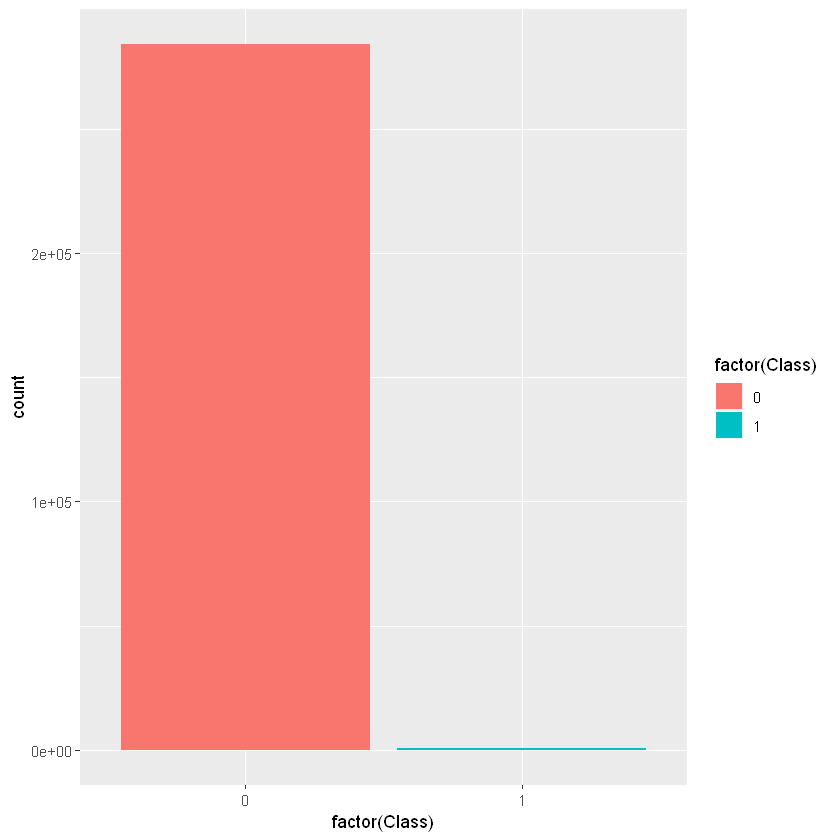

In [15]:
# Gráfico de barras da váriável Class
dados %>%
  ggplot(aes(factor(Class), fill = factor(Class))) +
  geom_bar()

## 4. Construindo modelo

<i> Nós temos um problema de classificação quando desejamos estimar o número de transações fraudulentas com cartão de crédito, uma vez que determinada transação pode ser categorizada como (1) fraude e (0) legal. Deste modo, usaremos os seguintes algorítimos: Logistic Regression e Decision Tree. </i>


In [4]:
# Divisão entre treinamento e teste

set.seed(123)
divisao<- sample.split(dados$Class, SplitRatio = 0.7)
treinamento<- subset(dados, divisao == T)
teste<- subset(dados, divisao == F)

In [20]:
# Visualizando a dimensão
dim(treinamento)
dim(teste)

[1] 199364     31

[1] 85443    31

In [21]:
# Verificação do processo de randomização
prop.table(table(treinamento$Class))
prop.table(table(teste$Class))



          0           1 
0.998274513 0.001725487 


          0           1 
0.998267851 0.001732149 

### 4.1 Regressão Logística

In [5]:
# Modelo glm

model_glm<- glm(Class ~ ., treinamento, family = binomial(link = "logit"))

In [6]:
# Predição do modelo
predict_glm<- predict(model_glm, teste[,-31], type = "response")


In [25]:
# Visualização do desempenho (matriz de confusão)

previsoes<- ifelse(predict_glm > 0.5, 1, 0)
matriz_confusao<- table(teste[,31], previsoes)
confusionMatrix(matriz_confusao, positive = "1")


Confusion Matrix and Statistics

   previsoes
        0     1
  0 85286     9
  1    55    93
                                         
               Accuracy : 0.9993         
                 95% CI : (0.999, 0.9994)
    No Information Rate : 0.9988         
    P-Value [Acc > NIR] : 3.607e-05      
                                         
                  Kappa : 0.7436         
                                         
 Mcnemar's Test P-Value : 1.855e-08      
                                         
            Sensitivity : 0.911765       
            Specificity : 0.999356       
         Pos Pred Value : 0.628378       
         Neg Pred Value : 0.999894       
             Prevalence : 0.001194       
         Detection Rate : 0.001088       
   Detection Prevalence : 0.001732       
      Balanced Accuracy : 0.955560       
                                         
       'Positive' Class : 1              
                                         

In [24]:
# Pseudo R ao quadrado (ajuste geral do modelo)

RsqGLM(model_glm)

$CoxSnell
[1] 0.01710324

$Nagelkerke
[1] 0.6818391

$McFadden
[1] 0.6790752

$Tjur
[1] 0.6027756

$sqPearson
[1] 0.5729653

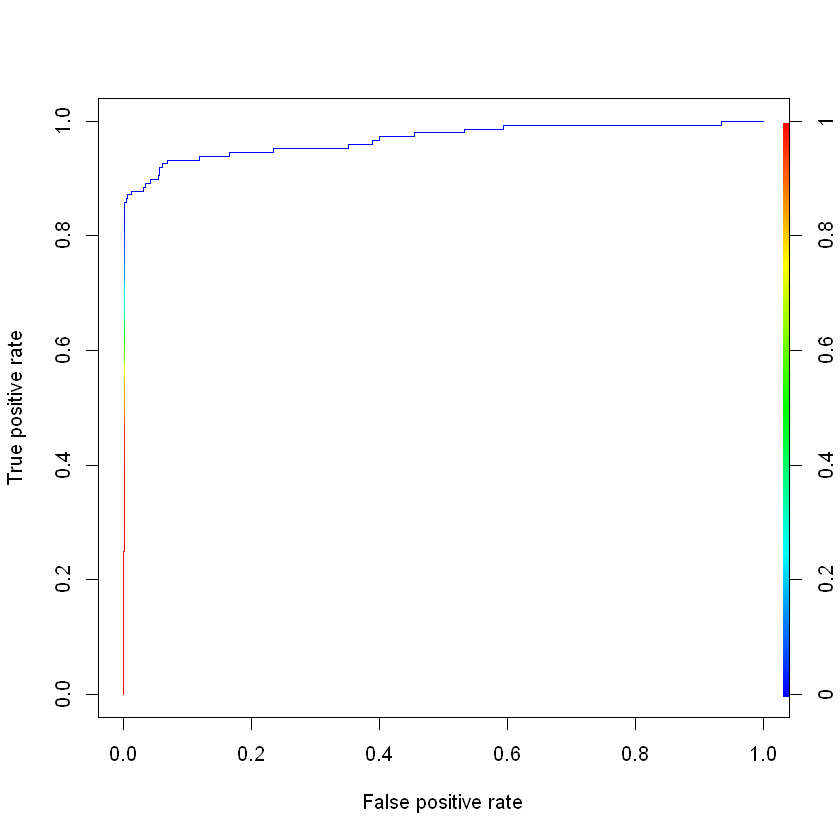

In [27]:
# Gráfico com acurácia geral do modelo (curva ROC)

ROCRpred<- prediction(predict_glm, teste$Class)
performance<- performance(ROCRpred, "tpr", "fpr")
plot(performance, colorize=TRUE)

Warning message in plot.ci.se(ci, type = "shape", col = "lightblue"):
"Low definition shape."

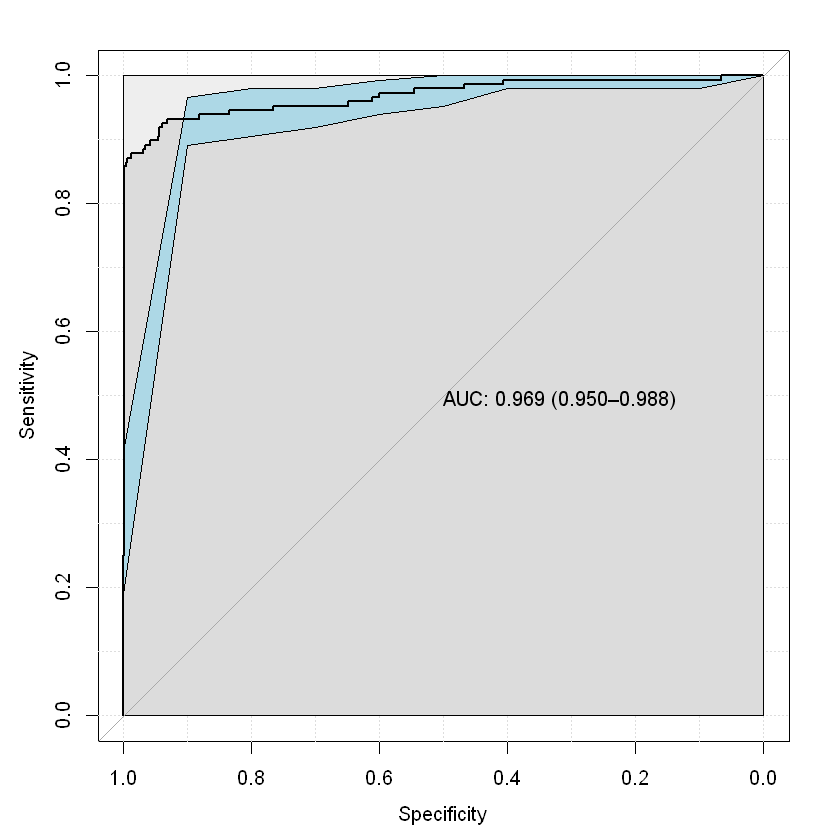

In [28]:
# Gráfico curva AUC com intervalo de confiança

curva_auc <- roc(teste$Class,predict_glm,
                smoothed = TRUE,
                ci=TRUE, ci.alpha=0.9, stratified=FALSE,
                plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
                print.auc=TRUE, show.thres=TRUE)


ci <- ci.se(curva_auc)
plot(ci, type="shape", col="lightblue")

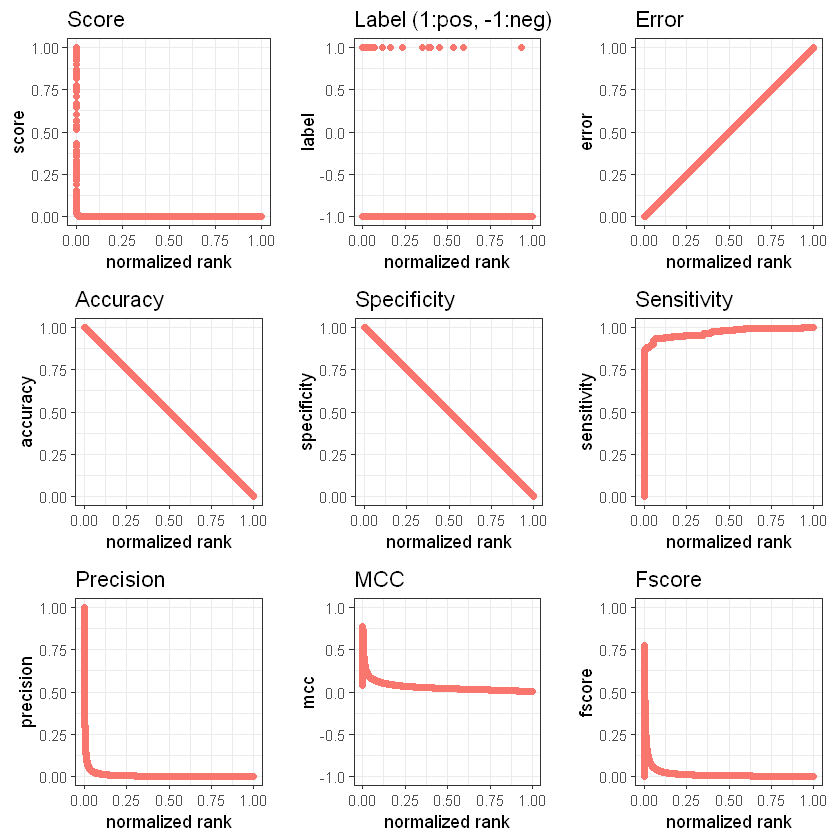

In [38]:
# Gráficos dos aspectos do modelo
aspectos_modelo <- evalmod(scores = predict_glm, labels = teste$Class, mode="basic")
autoplot(aspectos_modelo)

### 4.2 Árvore de decisão

In [29]:
# Modelo Decision Tree
model_tree<- rpart(Class ~ ., data = treinamento, method = "class", minbucket = 10, maxdepth = 5)

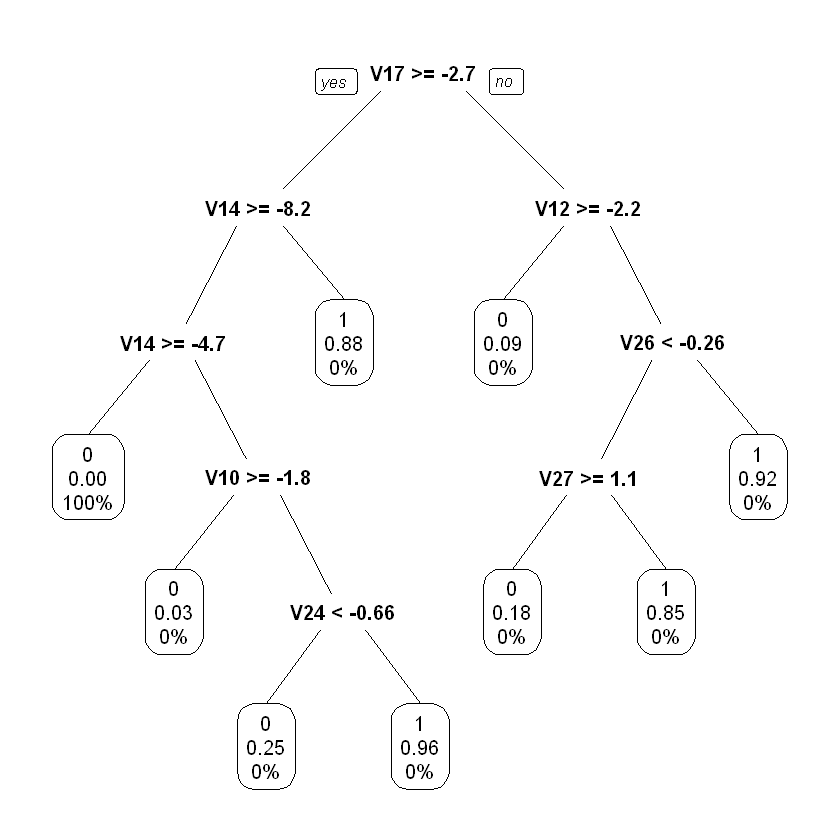

In [30]:
# Plotar a árvore
prp(model_tree, extra = 106) 

In [46]:
# Predição do modelo
predict_tree<- predict(model_tree, teste[,-31], type = "class")

In [54]:
# Tabela de comparação
CrossTable(teste$Class, predict_tree, prop.chisq = FALSE, 
           prop.c = FALSE, prop.r = FALSE, dnn = c("Actual", "Predicted"))

   Conteúdo das células 
|-------------------------|
|                       N | 
|     N / Total da tabela | 
|-------------------------|

          Predicted
Actual        0       1   Total
-------------------------------
0         85274      21   85295
          0.998   0.000        
-------------------------------
1            28     120     148
          0.000   0.001        
-------------------------------
Total     85302     141   85443

In [48]:
# Matriz de confusão
confusionMatrix(predict_tree, teste$Class, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 85274    28
         1    21   120
                                          
               Accuracy : 0.9994          
                 95% CI : (0.9992, 0.9996)
    No Information Rate : 0.9983          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8302          
                                          
 Mcnemar's Test P-Value : 0.3914          
                                          
            Sensitivity : 0.810811        
            Specificity : 0.999754        
         Pos Pred Value : 0.851064        
         Neg Pred Value : 0.999672        
             Prevalence : 0.001732        
         Detection Rate : 0.001404        
   Detection Prevalence : 0.001650        
      Balanced Accuracy : 0.905282        
                                          
       'Positive' Class : 1               
                  

### 4.3 Sumário dos modelos

<p></p>
Logistic Regression:
<p></p>
<li>Accuracy 99.93%</li>
<li>Sensitivity 91.17%</li>
<li>Specificity 99.93%</li>
<p></p>
DecisionTrees:
    <p></p>
<li>Accuracy 99.94%</li>
<li>Sensitivity 81.08%</li>
<li>Specificity 99.97%</li>
 <p></p>
 <p>
*Sensitivity -> positivos corretamente identificados<br />  
*Specificity -> negativos corretamente identificados</p>

<p><i>
Diego Ramirez<br />
daarfarias@hotmail.com<br />
https://github.com/daarfarias<br />
    
</i></p>